<a href="https://colab.research.google.com/github/Panperception/Face2Brain/blob/main/Face2Brain_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load PD DBS Face Data

In [ ]:
# !pip install tensorflow
import keras
import matplotlib.pyplot as plt

import numpy as np
import scipy.io

# from google.colab import drive
# drive.mount('/content/gdrive')
# ##!cp '/content/gdrive/My Drive/FacePD/PD_DBS_Data.mat' PD_DBS_Data.mat

import gdown

url = 'https://drive.google.com/file/d/1Yz9I435rIvz3ww2eLRI7kMTBiwthpaRk/view?usp=sharing'
save_file = 'PD_DBS_Data.mat'
gdown.download(url, save_file, quiet=False,fuzzy=True)

mat = scipy.io.loadmat(save_file)
x_train = mat['x_train']
x_test = mat['x_test']
y_train = mat['y_train']
y_test = mat['y_test']



Downloading...
From (original): https://drive.google.com/uc?id=1Yz9I435rIvz3ww2eLRI7kMTBiwthpaRk
From (redirected): https://drive.google.com/uc?id=1Yz9I435rIvz3ww2eLRI7kMTBiwthpaRk&confirm=t&uuid=e6bd7086-504d-41b4-aae1-0aff9feb6b03
To: /content/PD_DBS_Data.mat
100%|██████████| 19.2M/19.2M [00:00<00:00, 65.7MB/s]


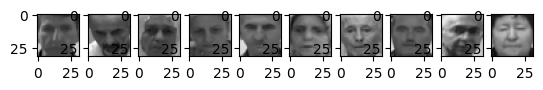

In [ ]:
for k in range(10):
  tmp=x_test[k*100,].reshape((32,32))
  plt.subplot(1,10,k+1)
  plt.imshow(np.tile(tmp,[3,1,1]).T)


## VGG16

In [ ]:
import keras
import matplotlib.pyplot as plt

#img_size_target = 32;
#img_input = tf.keras.layers.Input(shape=(img_size_target, img_size_target,1))
#img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])

from keras.applications.vgg16 import VGG16

## Loading VGG16 model
pre_model = VGG16(include_top=False, weights='imagenet', input_shape=(32,32,3))
pre_model.trainable = False ## Not trainable weights
# pre_model.layers[8].trainable = True
pre_model.layers[9].trainable = True
pre_model.layers[10].trainable = True
pre_model.layers[11].trainable = True
pre_model.layers[12].trainable = True
pre_model.layers[13].trainable = True

from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(128, activation='relu')
dense_layer_3 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model_vgg16 = models.Sequential([
    pre_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    prediction_layer
])

pre_model.summary()
model_vgg16.summary()


from keras.callbacks import EarlyStopping

model_vgg16.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=50,  restore_best_weights=True)


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,883,106 (56.77 MB)

 Trainable params: 6,658,274 (25.40 MB)

 Non-trainable params: 8,224,832 (31.38 MB)

Epoch 1/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.5130 - loss: 0.7654 - val_accuracy: 0.4407 - val_loss: 0.7331
Epoch 2/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5802 - loss: 0.6834 - val_accuracy: 0.4407 - val_loss: 0.7986
Epoch 3/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6333 - loss: 0.6566 - val_accuracy: 0.5254 - val_loss: 0.6850
Epoch 4/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7845 - loss: 0.4851 - val_accuracy: 0.7797 - val_loss: 0.4385
Epoch 5/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8505 - loss: 0.3367 - val_accuracy: 0.7797 - val_loss: 0.4304
Epoch 6/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9248 - loss: 0.1999 - val_accuracy: 0.7966 - val_loss: 0.6086
Epoch 7/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9373 - loss: 0.1704 - val_accuracy: 0.6102 - val_loss: 0.8523
Epoch 8/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9404 - loss: 0.1535 - val_accuracy: 0

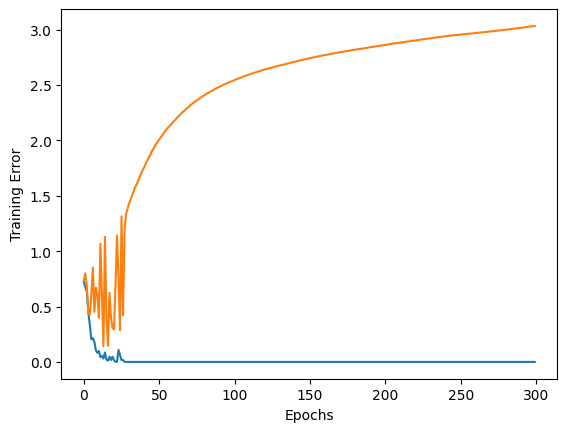

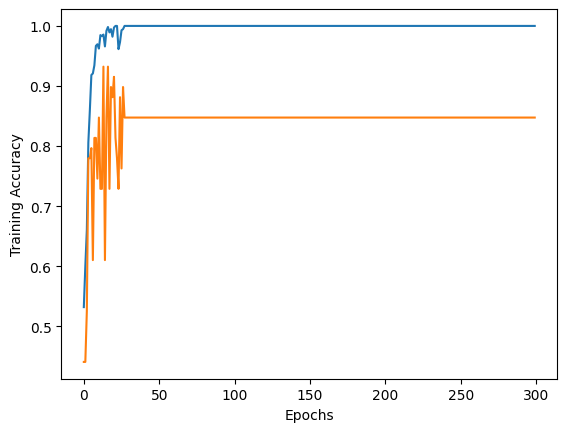

In [ ]:
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=2)
hist_v16=model_vgg16.fit(np.repeat(x_train.reshape((x_train.shape[0],32,32,1)), 3, axis=3), one_hot_labels, epochs=300, validation_split=0.05, batch_size=32, callbacks=[])

plt.figure(1);
plt.plot(hist_v16.history["loss"]);
plt.plot(hist_v16.history["val_loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

plt.figure(2);
plt.plot(hist_v16.history["accuracy"]);
plt.plot(hist_v16.history["val_accuracy"]);
plt.xlabel('Epochs');
plt.ylabel('Training Accuracy');


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Overall F1 score
y_pred=np.argmax(model_vgg16.predict(np.repeat(x_test.reshape((x_test.shape[0],32,32,1)), 3, axis=3)), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))
print("Accuracy:    ", np.mean(y_pred.reshape(1171,1)==y_test))



37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
F1 Score:   0.9788951969000631
Precision:  0.9820718215343691
Recall:     0.9763410991636798
Accuracy:     0.9795046968403074
Accuracy:     0.9795046968403074


## XAI

In [ ]:
import xgboost as xgb
import shap
import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
import pandas as pd

# Load dataset (binary classification)
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True, as_frame=True)

# Train/test split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train an XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)

# Predict probability
probs = model.predict_proba(X_test)[:, 1]  # probability for class 1 (positive)

# Use TreeExplainer (fast exact SHAP for tree models)
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Explain one prediction
i = 0  # first test example
print("Predicted probability:", probs[i])
print("SHAP values for instance:", shap_values[i].values)
print("Feature contributions sum to:", sum(shap_values[i].values))
print("Base value (mean output):", shap_values[i].base_values)

# Visualize explanation for one instance
shap.plots.waterfall(shap_values[i])


In [ ]:
!pip install shap
import shap

In [ ]:
xai_model = model_dmlp_adam

In [ ]:
img_rows=32
img_cols=32
background = x_train[np.random.choice(x_train.shape[0], 500, replace=False)]

In [ ]:
e = shap.DeepExplainer(xai_model, background)

In [ ]:
background = x_train[np.random.choice(x_train.shape[0], 500, replace=False)]
e = shap.DeepExplainer(xai_model, background)
shap_values = e.shap_values(x_test[1:5])
shap.image_plot(shap_values, -x_test)



In [ ]:
s_values = [(np.reshape(x,(x.shape[0],img_rows,img_cols))) for x in shap_values]
x_tst = np.reshape(x_test[1:5],(x_test[1:5].shape[0],img_rows,img_cols))
shap.image_plot(s_values, -x_tst)


In [ ]:
from tensorflow.python.keras.losses import categorical_crossentropy
from cxplain import MLPModelBuilder, ZeroMasking, CXPlain

x_train, y_train, x_test = ....  # Your dataset
explained_model = ...    # The model you wish to explain.

# Define the model you want to use to explain your __explained_model__.
# Here, we use a neural explanation model with a
# multilayer perceptron (MLP) architecture.
model_builder = MLPModelBuilder(num_layers=2, num_units=64, batch_size=256, learning_rate=0.001)

# Define your masking operation - the method of simulating the
# removal of input features used internally by CXPlain - ZeroMasking is typically a sensible default choice for tabular and image data.
masking_operation = ZeroMasking()

# Define the loss with which each input features' associated reduction in prediction error is calculated.
loss = categorical_crossentropy

# Build and fit a CXPlain instance.
explainer = CXPlain(explained_model, model_builder, masking_operation, loss)
explainer.fit(x_train, y_train)

# Use the __explainer__ to obtain explanations for the predictions of your __explained_model__.
attributions = explainer.explain(x_test)

In [ ]:
import sklearn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Overall F1 score
y_pred=np.argmax(model_dmlp_adam.predict(x_test), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))

# Overall F1 score

#intermediate_layer_model = keras.Model(inputs=model_dmlp_SGD.input,
#                                 outputs=model_dmlp_SGD.layers[0].output)
#intermediate_output = intermediate_layer_model.predict(x_test)
#ws=model_dmlp_SGD.layers[0].get_weights()
#y00=np.matmul(x_test,ws[0])+np.tile(ws[1],[x_test.shape[0],1])


y_pred=np.argmax(model_dmlp_SGD.predict(x_test), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))
#print("Accuracy:    ", np.mean(y_pred.reshape(1171,1)==y_test))

## DNN Classifiers

Epoch 1/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5726 - loss: 0.7140 - val_accuracy: 0.8136 - val_loss: 0.5719
Epoch 2/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6265 - loss: 0.6708 - val_accuracy: 0.5085 - val_loss: 0.6690
Epoch 3/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6457 - loss: 0.6182 - val_accuracy: 0.7966 - val_loss: 0.5342
Epoch 4/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6991 - loss: 0.5763 - val_accuracy: 0.4915 - val_loss: 0.7183
Epoch 5/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7323 - loss: 0.5327 - val_accuracy: 0.7119 - val_loss: 0.5579
Epoch 6/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7371 - loss: 0.5180 - val_accuracy: 0.6271 - val_loss: 0.6907
Epoch 7/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7750 - loss: 0.4599 - val_accuracy: 0.4576 - val_loss: 1.1464
Epoch 8/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7496 - loss: 0.4897 - val_accuracy: 0.61

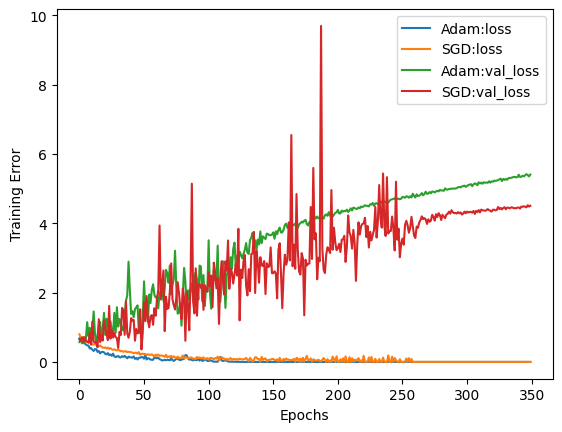

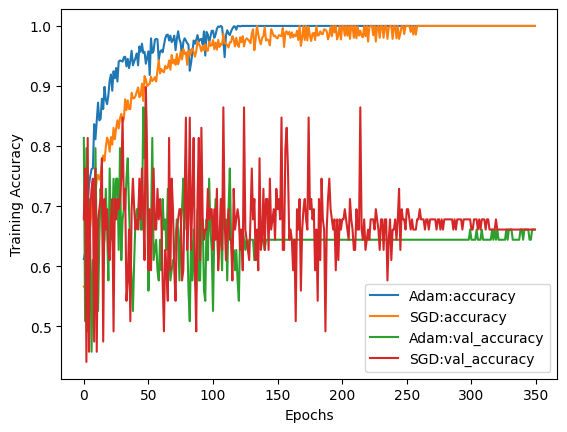

In [ ]:
# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=2)

inputsize = 1024

# define a 4 hidden layer DNN
model_dmlp_adam = keras.Sequential()
model_dmlp_adam.add(keras.Input(shape=(inputsize,)))
model_dmlp_adam.add(keras.layers.Dense(256, activation='relu'))
model_dmlp_adam.add(keras.layers.Dense(128, activation='relu'))
model_dmlp_adam.add(keras.layers.Dense(32, activation='relu'))
model_dmlp_adam.add(keras.layers.Dense(2, activation='softmax'))
model_dmlp_adam.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
hist1=model_dmlp_adam.fit(x_train, one_hot_labels,
                          epochs=350, validation_split=0.05, batch_size=32, callbacks=[])

# define a 4 hidden layer DNN
model_dmlp_SGD = keras.Sequential()
model_dmlp_SGD.add(keras.Input(shape=(inputsize,)))
model_dmlp_SGD.add(keras.layers.Dense(256, activation='relu'))
model_dmlp_adam.add(keras.layers.Dense(128, activation='relu'))
model_dmlp_SGD.add(keras.layers.Dense(32, activation='relu'))
model_dmlp_SGD.add(keras.layers.Dense(2, activation='softmax'))
model_dmlp_SGD.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
hist2=model_dmlp_SGD.fit(x_train, one_hot_labels,
                         epochs=350, validation_split=0.05, batch_size=32, callbacks=[])


plt.figure(1);
plt.plot(hist1.history["loss"]);
plt.plot(hist2.history["loss"]);
plt.plot(hist1.history["val_loss"]);
plt.plot(hist2.history["val_loss"]);
plt.xlabel('Epochs');
plt.legend(['Adam:loss', 'SGD:loss', 'Adam:val_loss', 'SGD:val_loss'])
plt.ylabel('Training Error');

plt.figure(2);
plt.plot(hist1.history["accuracy"]);
plt.plot(hist2.history["accuracy"]);
plt.plot(hist1.history["val_accuracy"]);
plt.plot(hist2.history["val_accuracy"]);
plt.xlabel('Epochs');
plt.legend(['Adam:accuracy', 'SGD:accuracy', 'Adam:val_accuracy', 'SGD:val_accuracy'])
plt.ylabel('Training Accuracy');

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Overall F1 score
y_pred=np.argmax(model_dmlp_adam.predict(x_test), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))

# Overall F1 score

#intermediate_layer_model = keras.Model(inputs=model_dmlp_SGD.input,
#                                 outputs=model_dmlp_SGD.layers[0].output)
#intermediate_output = intermediate_layer_model.predict(x_test)
#ws=model_dmlp_SGD.layers[0].get_weights()
#y00=np.matmul(x_test,ws[0])+np.tile(ws[1],[x_test.shape[0],1])


y_pred=np.argmax(model_dmlp_SGD.predict(x_test), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))
#print("Accuracy:    ", np.mean(y_pred.reshape(1171,1)==y_test))

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
F1 Score:   0.0
Precision:  0.0
Recall:     0.0
Accuracy:     0.0
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score:   0.9435475609388653
Precision:  0.9484263233190272
Recall:     0.9400283751493429
Accuracy:     0.9453458582408198


## VGG19

In [ ]:
import keras
import matplotlib.pyplot as plt

#img_size_target = 32;
#img_input = tf.keras.layers.Input(shape=(img_size_target, img_size_target,1))
#img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])

from keras.applications.vgg19 import VGG19

## Loading VGG16 model
pre_model = VGG19(include_top=False, weights='imagenet', input_shape=(32,32,3))
pre_model.trainable = False ## Not trainable weights
pre_model.layers[15].trainable = True
pre_model.layers[16].trainable = True
pre_model.layers[17].trainable = True
pre_model.layers[18].trainable = True
pre_model.layers[19].trainable = True

from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_0 = layers.Dense(256, activation='relu')
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model_v19 = models.Sequential([
    pre_model,
    flatten_layer,
    dense_layer_0,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

pre_model.summary()
model_v19.summary()

from keras.callbacks import EarlyStopping

model_v19.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=50,  restore_best_weights=True)


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 1, 1, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,192,802 (77.03 MB)

 Trainable params: 9,607,650 (36.65 MB)

 Non-trainable params: 10,585,152 (40.38 MB)

Epoch 1/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.4926 - loss: 0.8716 - val_accuracy: 0.4407 - val_loss: 0.7223
Epoch 2/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5765 - loss: 0.6824 - val_accuracy: 0.4407 - val_loss: 0.7605
Epoch 3/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6104 - loss: 0.6737 - val_accuracy: 0.4576 - val_loss: 0.7550
Epoch 4/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7387 - loss: 0.5600 - val_accuracy: 0.5932 - val_loss: 0.6504
Epoch 5/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7504 - loss: 0.5288 - val_accuracy: 0.6271 - val_loss: 0.8320
Epoch 6/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8134 - loss: 0.4475 - val_accuracy: 0.7966 - val_loss: 0.4743
Epoch 7/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8686 - loss: 0.3153 - val_accuracy: 0.7119 - val_loss: 1.0289
Epoch 8/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8935 - loss: 0.2443 - val_accuracy: 0

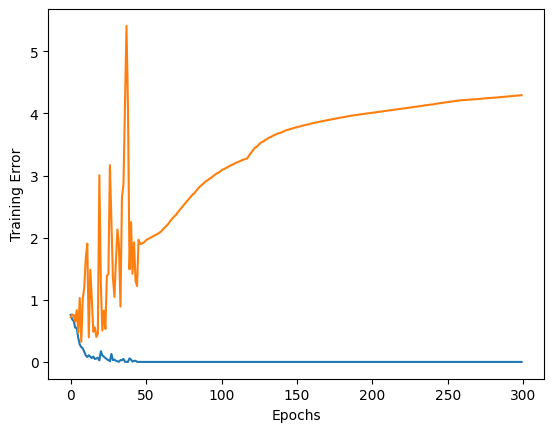

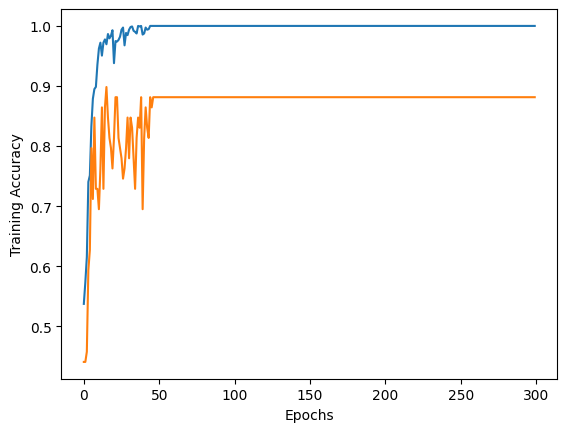

In [ ]:
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=2)
hist_v19=model_v19.fit(np.repeat(x_train.reshape((x_train.shape[0],32,32,1)), 3, axis=3), one_hot_labels, epochs=300, validation_split=0.05, batch_size=32, callbacks=[])

plt.figure(1);
plt.plot(hist_v19.history["loss"]);
plt.plot(hist_v19.history["val_loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

plt.figure(2);
plt.plot(hist_v19.history["accuracy"]);
plt.plot(hist_v19.history["val_accuracy"]);
plt.xlabel('Epochs');
plt.ylabel('Training Accuracy');


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Overall F1 score
y_pred=np.argmax(model_v19.predict(np.repeat(x_test.reshape((x_test.shape[0],32,32,1)), 3, axis=3)), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))
print("Accuracy:    ", np.mean(y_pred.reshape(1171,1)==y_test))


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
F1 Score:   0.9710569894865038
Precision:  0.9726248083916924
Recall:     0.9696744324970132
Accuracy:     0.9718189581554227
Accuracy:     0.9718189581554227


## ResNet50

In [ ]:
import keras
import matplotlib.pyplot as plt

#img_size_target = 32;
#img_input = tf.keras.layers.Input(shape=(img_size_target, img_size_target,1))
#img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])

from keras.applications.resnet import ResNet50

## Loading VGG16 model
pre_model = ResNet50(include_top=False, weights='imagenet', input_shape=(32,32,3))
pre_model.trainable = False ## Not trainable weights
pre_model.layers[18].trainable = True
pre_model.layers[19].trainable = True
pre_model.layers[20].trainable = True
pre_model.layers[21].trainable = True
pre_model.layers[22].trainable = True

from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_0 = layers.Dense(256, activation='relu')
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model_resnet50 = models.Sequential([
    pre_model,
    flatten_layer,
    dense_layer_0,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

pre_model.summary()
model_resnet50.summary()

from keras.callbacks import EarlyStopping

model_resnet50.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=50,  restore_best_weights=True)


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_14[0… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,149,346 (92.12 MB)

 Trainable params: 615,138 (2.35 MB)

 Non-trainable params: 23,534,208 (89.78 MB)

In [ ]:
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=2)
hist_ResNet=model_resnet50.fit(np.repeat(x_train.reshape((x_train.shape[0],32,32,1)), 3, axis=3), one_hot_labels, epochs=300, validation_split=0.05, batch_size=32, callbacks=[])

plt.figure(1);
plt.plot(hist_ResNet.history["loss"]);
plt.plot(hist_ResNet.history["val_loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

plt.figure(2);
plt.plot(hist_ResNet.history["accuracy"]);
plt.plot(hist_ResNet.history["val_accuracy"]);
plt.xlabel('Epochs');
plt.ylabel('Training Accuracy');


Epoch 1/300


InternalError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-25-2f46f07cf824>", line 2, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

ptxas exited with non-zero error code 2, output: : If the error message indicates that a file could not be written, please verify that sufficient filesystem space is provided.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_581622]

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Overall F1 score
y_pred=np.argmax(model_resnet50.predict(np.repeat(x_test.reshape((x_test.shape[0],32,32,1)), 3, axis=3)), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))
print("Accuracy:    ", np.mean(y_pred.reshape(1171,1)==y_test))



## AlexNet

In [ ]:
import keras
import matplotlib.pyplot as plt

#img_size_target = 32;
#img_input = tf.keras.layers.Input(shape=(img_size_target, img_size_target,1))
#img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])

from keras.applications. import AlexNet

## Loading VGG16 model
pre_model = AlexNet(include_top=False, weights='imagenet', input_shape=(32,32,3))
pre_model.trainable = True ## Not trainable weights

from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model_alexnet = models.Sequential([
    pre_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

pre_model.summary()
model_alexnet.summary()

from keras.callbacks import EarlyStopping

model_alexnet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=50,  restore_best_weights=True)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,784,546 (56.40 MB)

 Trainable params: 69,858 (272.88 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Pretrained Inception

In [ ]:
import keras
import matplotlib.pyplot as plt

#img_size_target = 32;
#img_input = tf.keras.layers.Input(shape=(img_size_target, img_size_target,1))
#img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])

from keras.applications.xception import Xception

## Loading VGG16 model
pre_model = Xception(input_shape = (256, 256, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')
pre_model.trainable = False ## Not trainable weights

from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model = models.Sequential([
    pre_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

pre_model.summary()
model.summary()

In [ ]:
# from keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

one_hot_labels = keras.utils.to_categorical(y_train, num_classes=2)

xx = np.repeat(x_train.reshape(x_train.shape[0],32,32,1), 3, axis=3).resize(512,512)
# np.repeat(x_train.reshape((x_train.shape[0],32,32,1)), 3, axis=3)
hist_Inception=model.fit(xx, one_hot_labels, epochs=300, validation_split=0.05, batch_size=32, callbacks=[])

plt.figure(1);
plt.plot(hist_Inception.history["loss"]);
plt.plot(hist_Inception.history["val_loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

plt.figure(2);
plt.plot(hist_Inception.history["accuracy"]);
plt.plot(hist_Inception.history["val_accuracy"]);
plt.xlabel('Epochs');
plt.ylabel('Training Accuracy');


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Overall F1 score
y_pred=np.argmax(model.predict(np.repeat(x_test.reshape((x_test.shape[0],32,32,1)), 3, axis=3)), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))
print("Accuracy:    ", np.mean(y_pred.reshape(1171,1)==y_test))


## Summary

In [ ]:
plt.plot(hist1.history['loss']);
plt.plot(hist_v16.history['loss']);
plt.plot(hist_v19.history['loss']);
plt.plot(hist_ResNet.history['loss']);
plt.legend(['V16', 'V19', 'ResNet50'])

#plt.plot(hist_ResNet.history['accuracy']);
#plt.plot(hist_v19.history['val_loss']);
#plt.plot(hist_v19.history['val_accuracy']);
plt.xlabel('Epochs');
plt.ylabel('Training Criteria');